# Linear Regression  - Multiple Variables
Reference: https://towardsdatascience.com/linear-regression-using-python-ce21aa90ade6

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #Data visualisation libraries 
import seaborn as sns
%matplotlib inline

In [2]:
USAhousing = pd.read_csv('USA_Housing.csv')
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
print (USAhousing.info())
print (USAhousing.describe())
print (USAhousing.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB
None
       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%     

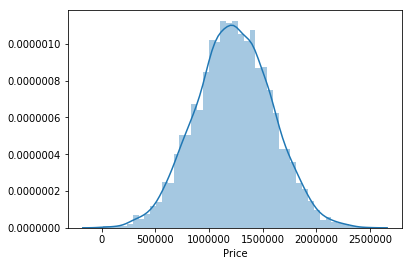

In [4]:
sns.distplot(USAhousing['Price'])

# Correlational Analysis

In [5]:
corr = USAhousing.corr()
corr = corr.round(2)
corr.style.background_gradient()
# print (corr)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1,-0,-0.01,0.02,-0.02,0.64
Avg. Area House Age,-0,1,-0.01,0.01,-0.02,0.45
Avg. Area Number of Rooms,-0.01,-0.01,1,0.46,0,0.34
Avg. Area Number of Bedrooms,0.02,0.01,0.46,1,-0.02,0.17
Area Population,-0.02,-0.02,0,-0.02,1,0.41
Price,0.64,0.45,0.34,0.17,0.41,1


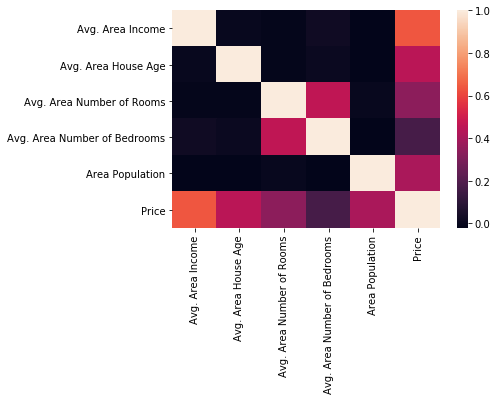

In [6]:
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [7]:
XX = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]

X = USAhousing.loc[:, ~USAhousing.columns.isin(['Price', 'Address'])]

y = USAhousing['Price']

In [8]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [9]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [49]:
X_norm=(X-X.min())/(X.max()-X.min())
X_norm.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,0.686822,0.441986,0.501502,0.464444,0.329942
1,0.683521,0.488538,0.464501,0.242222,0.575968
2,0.483737,0.468609,0.701350,0.695556,0.528582
3,0.506630,0.660956,0.312430,0.280000,0.491549
4,0.469223,0.348556,0.611851,0.495556,0.376988


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99, random_state=101)

In [51]:
print ('X_Train:',X_train.shape)
print ('y_Train:',y_train.shape)
print ('X_Test:',X_test.shape)
print ('y_Test:',y_test.shape)

X_Train: (50, 5)
y_Train: (50,)
X_Test: (4950, 5)
y_Test: (4950,)


In [2]:
from sklearn.linear_model import LinearRegression
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))
lm = LinearRegression()
lm.fit(X_train,y_train)

The scikit-learn version is 0.20.2.


NameError: name 'X_train' is not defined

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

In [53]:
predictions = lm.predict(X_test)

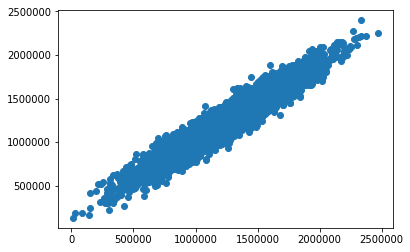

In [54]:
plt.scatter(y_test,predictions)

In [55]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print('Coefficients: \n', lm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predictions))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predictions))

Coefficients: 
 [ 2.00510263e+01  1.49479755e+05  1.17678313e+05 -1.23685509e+04
  1.58528380e+01]
Mean squared error: 11218405386.21
Variance score: 0.91


In [56]:
train_accuracy = lm.score(X_train,y_train)
print('Train accuracy: ', train_accuracy*100,'%')
test_accuracy = lm.score(X_test,y_test)
print('Test accuracy: ', test_accuracy*100,'%')



Train accuracy:  94.22428526559872 %
Test accuracy:  91.00540131293427 %


# Excercise - To Do
https://www.kaggle.com/gpandi007/usa-housing-dataset